In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data & Rename Columns

In [21]:
df = pd.read_csv("Mall_Customers_Dataset.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.rename(columns={ 'Spending Score (1-100)' : 'Spending_Score'}, inplace = True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df_Short = df[['Age','Spending_Score']]
df_Short.head()

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


# Elbow Method to Indetify Number of  Clusters

In [7]:
import sklearn.cluster as cluster

In [8]:
K = range(1,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(df_Short)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avo

# convert clusters and WSS into DataFrame

In [10]:
clusters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
clusters

,Clusters,WSS
0,1,171535.500000
1,2,75949.156010
2,3,45840.676616
3,4,28165.583567
4,5,23810.462233
5,6,19515.469236
6,7,15514.193134
7,8,13054.172146
8,9,11598.170315
9,10,10228.006282


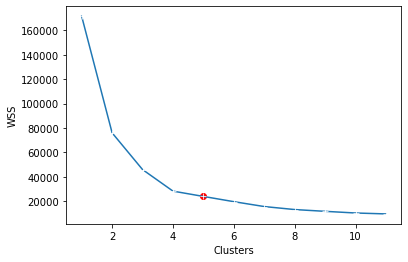

In [11]:
sns.lineplot(x = 'Clusters', y = 'WSS', data = clusters, marker="+")

plt.scatter(x=5, y=clusters.loc[clusters['Clusters'] == 5, 'WSS'], color='red')
plt.show()

# Perform K-Mean Clustering with 5 Clusters 


In [15]:
kmeans = cluster.KMeans(n_clusters=5 ,init="k-means++")
kmeans = kmeans.fit(df[['Spending_Score','Age']])

d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
df['Clusters'] = kmeans.labels_

In [17]:
kmeans.labels_

array([4, 1, 0, 1, 4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 4, 3, 1, 3, 1,
       0, 1, 0, 1, 3, 4, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 3, 4,
       3, 4, 2, 4, 4, 4, 2, 4, 4, 2, 3, 3, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4,
       3, 2, 4, 4, 2, 3, 2, 2, 2, 4, 3, 3, 4, 3, 2, 4, 2, 3, 4, 3, 2, 4,
       4, 3, 2, 4, 3, 3, 4, 4, 3, 4, 3, 4, 4, 3, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 4, 3, 4, 4, 4, 2, 2, 3, 2, 4, 3, 4, 1, 4, 1, 3, 1, 0, 1, 0, 1,
       4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 3, 1, 0, 1, 3, 4, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 3, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1,
       0, 1])

<AxesSubplot:xlabel='Spending_Score', ylabel='Age'>

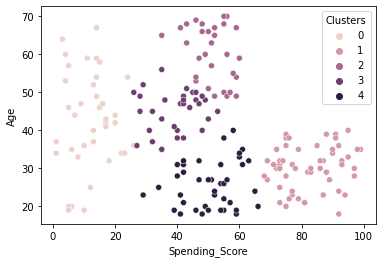

In [18]:
sns.scatterplot(x="Spending_Score", y="Age",hue = 'Clusters',  data=df)


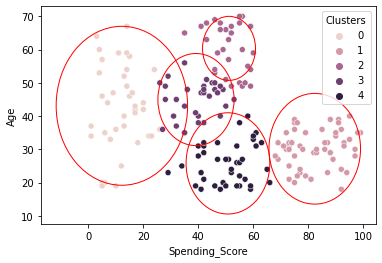

In [19]:
sns.scatterplot(x="Spending_Score", y="Age",hue = 'Clusters',  data=df)
# Get unique cluster labels
cluster_labels = df['Clusters'].unique()

# Iterate over each cluster
for label in cluster_labels:
    # Get points of the current cluster
    cluster_points = df[df['Clusters'] == label]
    
    # Calculate the centroid of the cluster
    centroid_x = cluster_points['Spending_Score'].mean()
    centroid_y = cluster_points['Age'].mean()
    
    # Calculate the radius of the circle
    radius = max(cluster_points['Spending_Score'].max() - centroid_x, cluster_points['Age'].max() - centroid_y)
    
    # Draw a circle around the cluster
    circle = plt.Circle((centroid_x, centroid_y), radius, color='red', fill=False)
    plt.gca().add_patch(circle)

# Show the plot
plt.show()